<a href="https://colab.research.google.com/github/Dinesh-Adhithya-H/Deep_Learning_using_Tensorflow/blob/main/C2_2_Cats_vs_Dogs_Classification_Conv_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-02-06 06:07:18--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   102MB/s    in 0.6s    

2021-02-06 06:07:19 (102 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import os
import zipfile

local_zip="/tmp/cats_and_dogs_filtered.zip"
zip=zipfile.ZipFile(local_zip,"r")
zip.extractall("/tmp")
zip.close()

In [3]:
base_dir="/tmp/cats_and_dogs_filtered"

train_dir=os.path.join(base_dir,"train")
validation_dir=os.path.join(base_dir,"validation")

train_dogs_dir=os.path.join(train_dir,"dogs")
train_cats_dir=os.path.join(train_dir,"cats")

validation_cats_dir=os.path.join(validation_dir,"cats")
validation_dogs_dir=os.path.join(validation_dir,"dogs")

In [4]:
train_cat_fnames=os.listdir(train_cats_dir)
train_dog_fnames=os.listdir(train_dogs_dir)

In [5]:
print(train_dog_fnames[:10]),print(train_cat_fnames[:10])

['dog.715.jpg', 'dog.717.jpg', 'dog.949.jpg', 'dog.861.jpg', 'dog.341.jpg', 'dog.469.jpg', 'dog.566.jpg', 'dog.265.jpg', 'dog.711.jpg', 'dog.448.jpg']
['cat.3.jpg', 'cat.313.jpg', 'cat.933.jpg', 'cat.916.jpg', 'cat.82.jpg', 'cat.75.jpg', 'cat.660.jpg', 'cat.371.jpg', 'cat.996.jpg', 'cat.846.jpg']


(None, None)

In [6]:
len(os.listdir(train_cats_dir)),len(os.listdir(train_dogs_dir))

(1000, 1000)

In [7]:
len(os.listdir(validation_cats_dir)),len(os.listdir(validation_dogs_dir))

(500, 500)

In [8]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows=4
ncols=4

pic_index=0

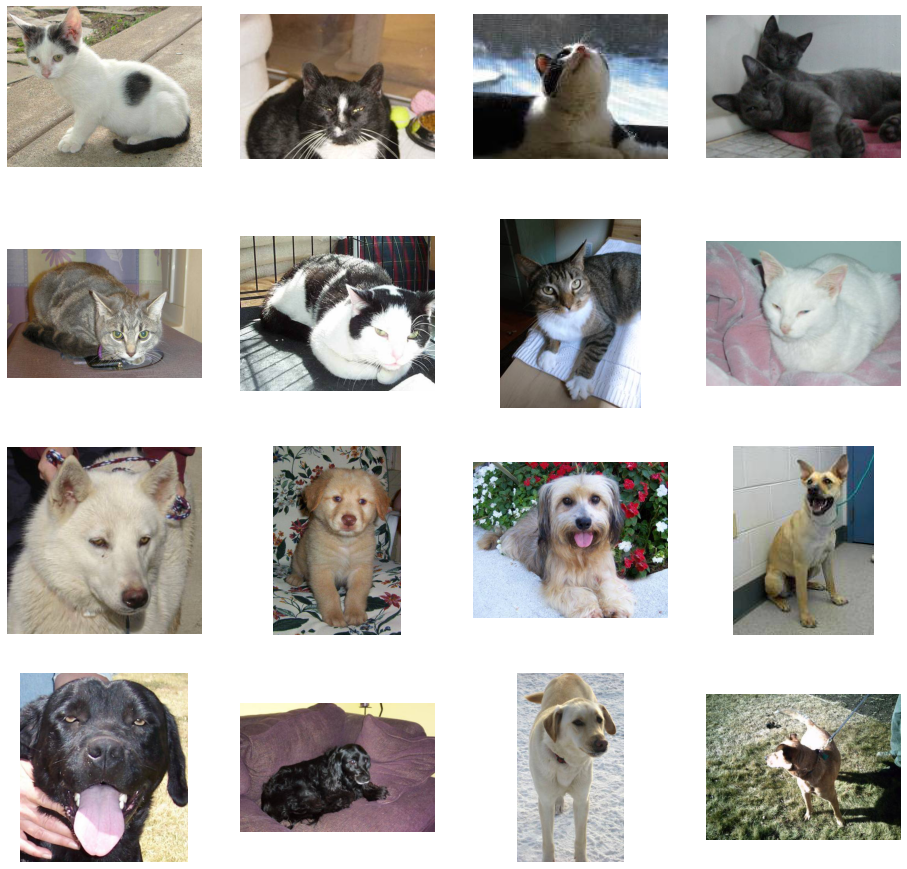

In [9]:
fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)

pic_index+=8

next_cat_pix=[os.path.join(train_cats_dir,fname) for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix=[os.path.join(train_dogs_dir,fname) for fname in train_dog_fnames[pic_index-8:pic_index]]

for i,img_path in enumerate(next_cat_pix+next_dog_pix):
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis("Off")
  img=mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [10]:
import tensorflow as tf
model=tf.keras.Sequential([
  tf.keras.layers.Conv2D(16,(3,3),activation="relu",input_shape=(150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32,(3,3),activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3),activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256,activation="relu"),
  tf.keras.layers.Dense(1,activation="sigmoid")
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [12]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1.0/255.0,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode="nearest")
test_datagen=ImageDataGenerator(rescale=1.0/255.0)
train_generator=train_datagen.flow_from_directory(train_dir,batch_size=20,class_mode="binary",target_size=(150,150))
validation_generator=test_datagen.flow_from_directory(validation_dir,batch_size=20,class_mode="binary",target_size=(150,150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
history=model.fit(train_generator,validation_data=validation_generator,steps_per_epoch=100,epochs=15,validation_steps=50,verbose=2)

Epoch 1/15
100/100 - 24s - loss: 0.7164 - accuracy: 0.5190 - val_loss: 0.6898 - val_accuracy: 0.6250
Epoch 2/15
100/100 - 17s - loss: 0.6905 - accuracy: 0.5380 - val_loss: 0.6850 - val_accuracy: 0.5690
Epoch 3/15
100/100 - 17s - loss: 0.6835 - accuracy: 0.5525 - val_loss: 0.6818 - val_accuracy: 0.5630
Epoch 4/15
100/100 - 17s - loss: 0.6756 - accuracy: 0.5855 - val_loss: 0.6315 - val_accuracy: 0.6490
Epoch 5/15
100/100 - 17s - loss: 0.6523 - accuracy: 0.6070 - val_loss: 0.6338 - val_accuracy: 0.6710
Epoch 6/15
100/100 - 16s - loss: 0.6533 - accuracy: 0.6340 - val_loss: 0.6075 - val_accuracy: 0.6720
Epoch 7/15
100/100 - 16s - loss: 0.6397 - accuracy: 0.6350 - val_loss: 0.6077 - val_accuracy: 0.6970
Epoch 8/15
100/100 - 16s - loss: 0.6294 - accuracy: 0.6465 - val_loss: 0.5805 - val_accuracy: 0.6820
Epoch 9/15
100/100 - 16s - loss: 0.6212 - accuracy: 0.6475 - val_loss: 0.6294 - val_accuracy: 0.6550
Epoch 10/15
100/100 - 17s - loss: 0.6259 - accuracy: 0.6440 - val_loss: 0.6030 - val_accura

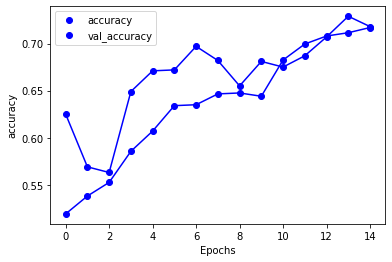

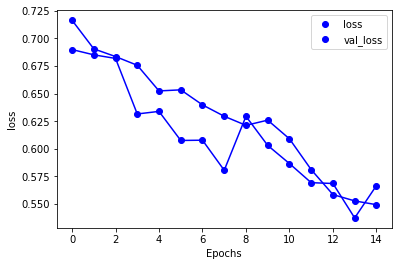

In [15]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string],"bo")
  plt.plot(history.history['val_'+string],"bo")
  plt.plot(history.history[string],"b")
  plt.plot(history.history['val_'+string],"b")
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")